In [1]:
from google.colab import files
uploaded = files.upload()

Saving hotel_bookings.csv to hotel_bookings.csv


# **Importing Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Exploratory Data Analysis (EDA) & Data Quality Report**

In [3]:
df = pd.read_csv("/content/hotel_bookings.csv")

In [4]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [6]:
df.shape

(119390, 32)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

**I should change the data type of reservation_status_date in to the suitable data type which is date time not object**

In [8]:
df["reservation_status_date"] = pd.to_datetime(df['reservation_status_date'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [10]:
for col in df.describe(include='object').columns:
    print(f"{col}: {df[col].unique()}")
    print("-" * 20)

hotel: ['Resort Hotel' 'City Hotel']
--------------------
arrival_date_month: ['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------
meal: ['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------
country: ['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'IS

In [11]:
Columns_with_Null = df.columns[df.isnull().sum() > 0]
Columns_with_Null

Index(['children', 'country', 'agent', 'company'], dtype='object')

In [12]:
df[Columns_with_Null].isnull().sum()

,0
children,4
country,488
agent,16340
company,112593


In [13]:
# As company and agent not important columns and have too missing values, they can be removed and there will not be a bad effect
df.drop(['company', 'agent'], axis=1, inplace=True)

It is observable that only childeren, country, agent, company columns from 32 columns have null values with the most in company

In [14]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,2.321149,101.831122,0.062518,0.571363,2016-07-30 00:24:47.883407104
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.290000,0.000000,0.000000,2016-02-01 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.575000,0.000000,0.000000,2016-08-07 00:00:00
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-08 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,17.594721,50.535790,0.245291,0.792798,NaN


/tmp/ipython-input-2534141169.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=month_counts.index, y=month_counts.values, palette="viridis")


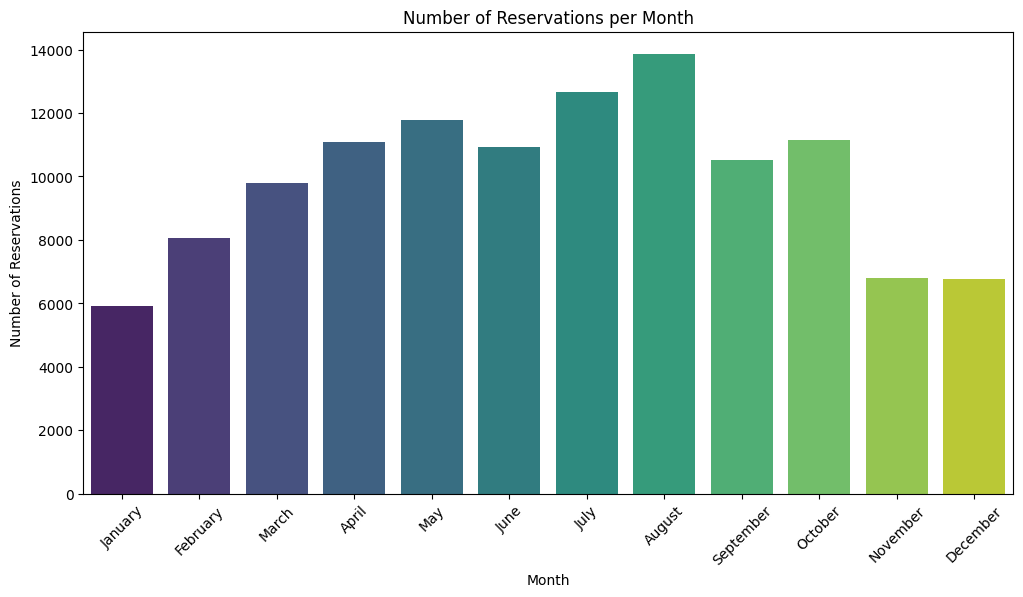

In [15]:
month_counts = df['arrival_date_month'].value_counts().reindex([
    'January','February','March','April','May','June',
    'July','August','September','October','November','December'
])
plt.figure(figsize=(12,6))
sns.barplot(x=month_counts.index, y=month_counts.values, palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Number of Reservations")
plt.title("Number of Reservations per Month")
plt.show()

August is the month in which most reservations done.

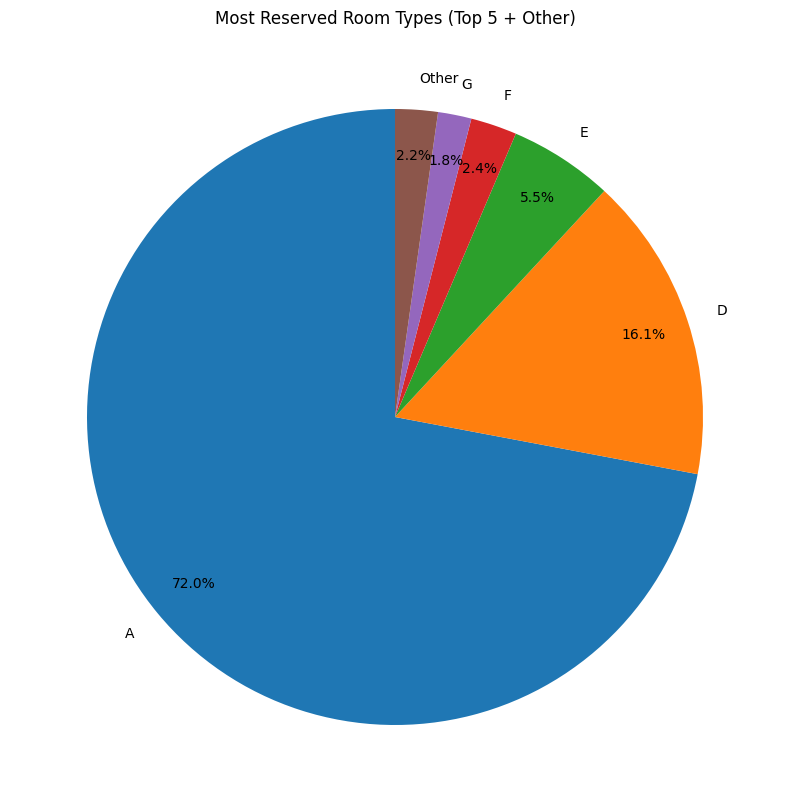

In [16]:
room_type_count = df['reserved_room_type'].value_counts()

top5 = room_type_count[:5]
others = room_type_count[5:].sum()

room_type_count = pd.concat([top5, pd.Series({'Other': others})])
plt.figure(figsize=(10,10))
plt.pie(room_type_count, labels=room_type_count.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85, labeldistance=1.1)
plt.title("Most Reserved Room Types (Top 5 + Other)")
plt.show()

72 Percentage of people prefer room of type A

In [17]:
country_counts = df['country'].value_counts().head(10)
country_counts

,count
country,
PRT,48590
GBR,12129
FRA,10415
ESP,8568
DEU,7287
ITA,3766
IRL,3375
BEL,2342
BRA,2224


/tmp/ipython-input-2951477354.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.index, y=country_counts.values, palette="mako")


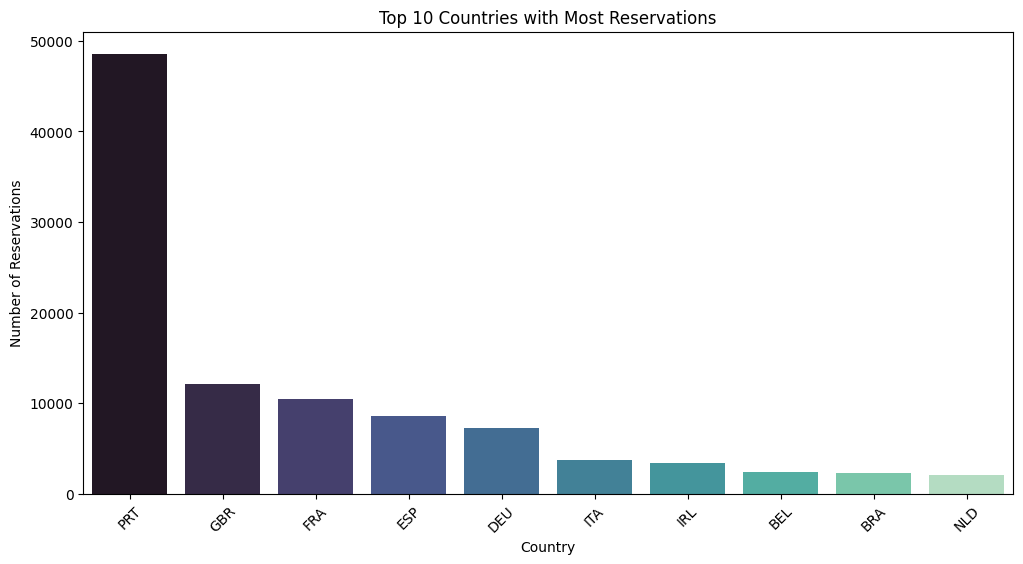

In [18]:
plt.figure(figsize=(12,6))
sns.barplot(x=country_counts.index, y=country_counts.values, palette="mako")
plt.xlabel("Country")
plt.ylabel("Number of Reservations")
plt.title("Top 10 Countries with Most Reservations")
plt.xticks(rotation=45)
plt.show()

As the dataset was collected from Portuguese hotels, it appears that most reservations are people from Portugal

In [19]:
cancel_percent = df['is_canceled'].value_counts(normalize=True) * 100
cancel_percent

,proportion
is_canceled,
0,62.958372
1,37.041628


0 -> not conceled (62.96 %)

1 -> canceled (37.04 %)

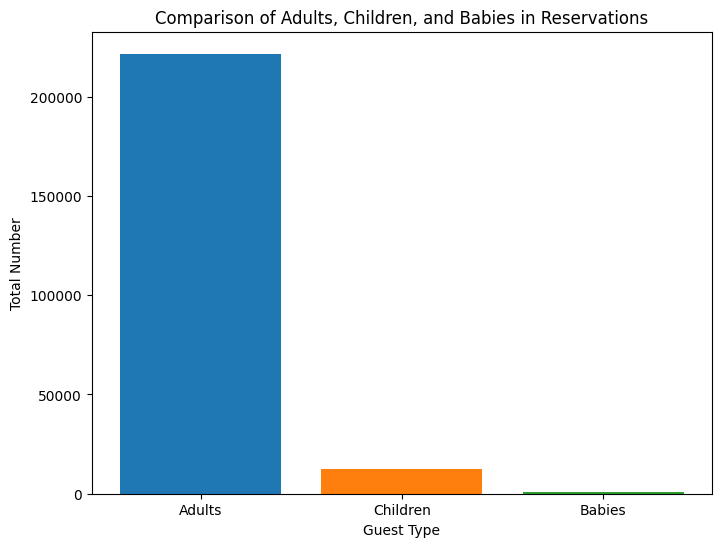

In [20]:
total_clients = {
    "Adults" : df['adults'].sum(),
    "Children" : df['children'].sum(),
    "Babies" : df['babies'].sum()
}

plt.figure(figsize=(8,6))
plt.bar(total_clients.keys(), total_clients.values(), color=['#1f77b4','#ff7f0e','#2ca02c'])
plt.xlabel("Guest Type")
plt.ylabel("Total Number")
plt.title("Comparison of Adults, Children, and Babies in Reservations")
plt.show()

It seems that adults are the most clients, this may means that the hotel is perfect for honey moon for husbands.

In [21]:
deposit_count = df["deposit_type"].value_counts()
deposit_count

,count
deposit_type,
No Deposit,104641
Non Refund,14587
Refundable,162


No Deposit –> No deposit was made

Non Refund –> The guest paid a deposit equal to the full cost of the stay, and it’s non-refundable.

Refundable –> The guest paid a partial deposit (less than the total cost), and it can be refunded if canceled under the policy.

/tmp/ipython-input-1569086873.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=deposit_count.index, y=deposit_count.values, palette="pastel")


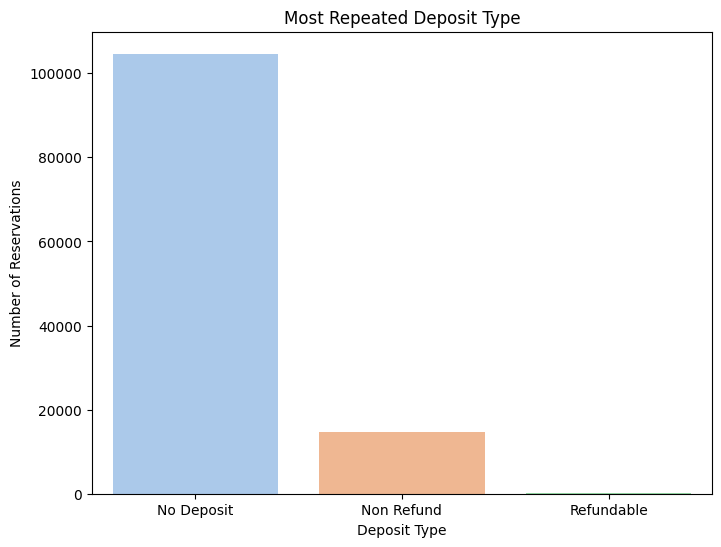

In [22]:
plt.figure(figsize=(8,6))
sns.barplot(x=deposit_count.index, y=deposit_count.values, palette="pastel")
plt.xlabel("Deposit Type")
plt.ylabel("Number of Reservations")
plt.title("Most Repeated Deposit Type")
plt.show()

Most reservations are “No Deposit” -> meaning hotels largely allow bookings without upfront payment.

In [23]:
parking_by_month = df.groupby('arrival_date_month')['required_car_parking_spaces'].sum()
months_order = ['January','February','March','April','May','June',
                'July','August','September','October','November','December']
parking_by_month = parking_by_month.reindex(months_order)

/tmp/ipython-input-1213474549.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=parking_by_month.index, y=parking_by_month.values, palette="Blues_d")


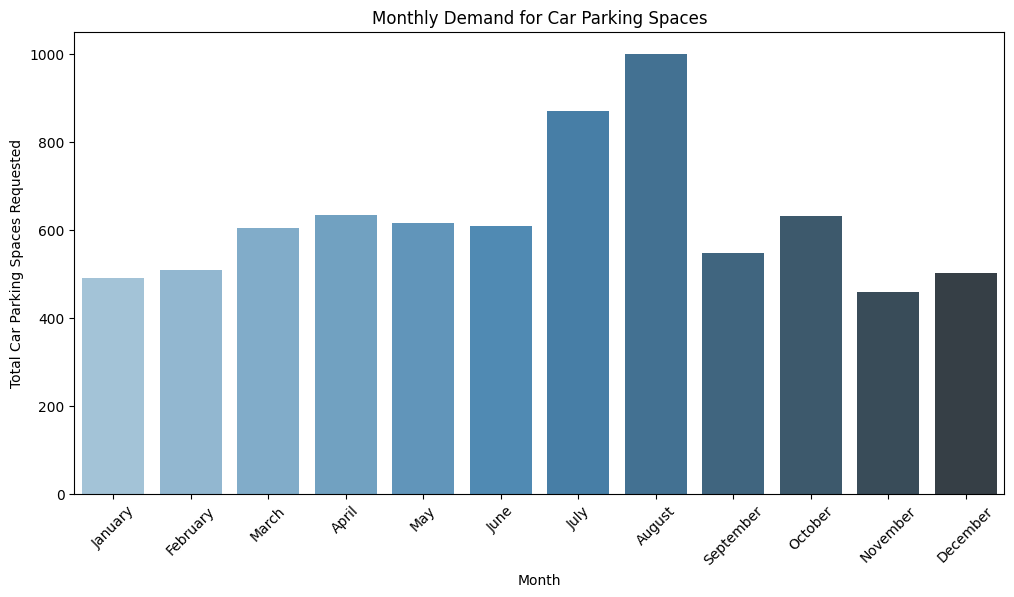

In [24]:
plt.figure(figsize=(12,6))
sns.barplot(x=parking_by_month.index, y=parking_by_month.values, palette="Blues_d")
plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Total Car Parking Spaces Requested")
plt.title("Monthly Demand for Car Parking Spaces")
plt.show()

In [25]:
waiting_vs_cancel = df.groupby('is_canceled')['days_in_waiting_list'].mean()
print(waiting_vs_cancel)

is_canceled
0    1.589868
1    3.564083
Name: days_in_waiting_list, dtype: float64


is_canceled = 1 has a much higher average, it means customers with longer waits cancel more.

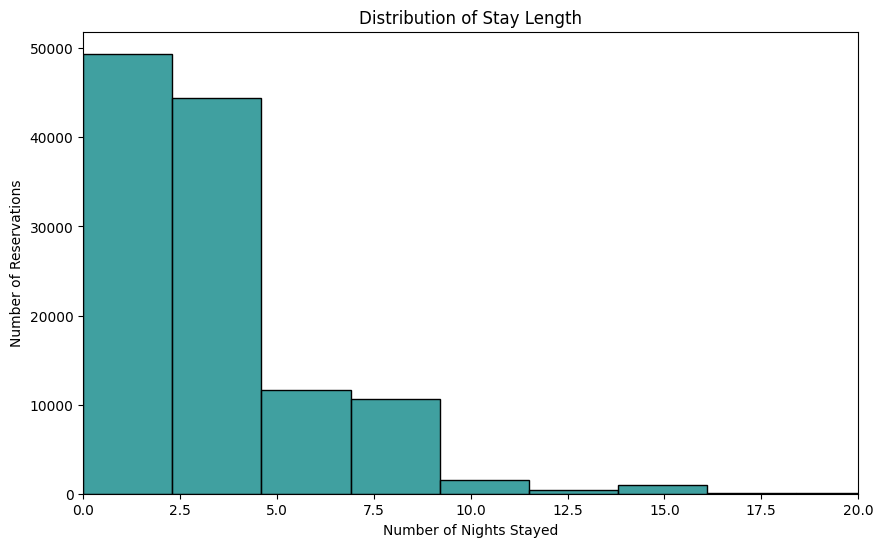

In [26]:
total_nights = df["stays_in_weekend_nights"] + df["stays_in_week_nights"]

plt.figure(figsize=(10,6))
sns.histplot(total_nights, bins=30, kde=False, color="teal")
plt.xlabel("Number of Nights Stayed")
plt.ylabel("Number of Reservations")
plt.title("Distribution of Stay Length")
plt.xlim(0, 20)
plt.show()

In [27]:
resort_hotel= df[df['hotel']=='Resort Hotel']
City_Hotel = df[df['hotel']=='City Hotel']
resort_hotel = resort_hotel.groupby('reservation_status_date')[['adr']].mean()
City_Hotel = City_Hotel.groupby('reservation_status_date')[['adr']].mean()

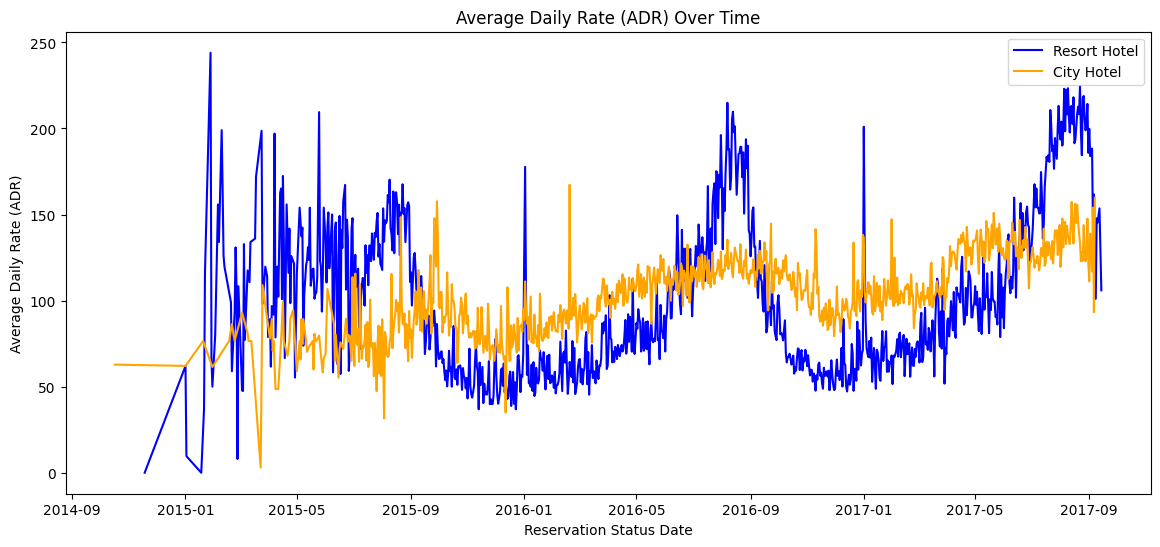

In [28]:
plt.figure(figsize=(14,6))

plt.plot(resort_hotel.index, resort_hotel['adr'], label="Resort Hotel", color="blue")
plt.plot(City_Hotel.index, City_Hotel['adr'], label="City Hotel", color="orange")

plt.title("Average Daily Rate (ADR) Over Time")
plt.xlabel("Reservation Status Date")
plt.ylabel("Average Daily Rate (ADR)")
plt.legend()
plt.show()

/tmp/ipython-input-1224963149.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cancellation_rate.index, y=cancellation_rate.values, palette="coolwarm")


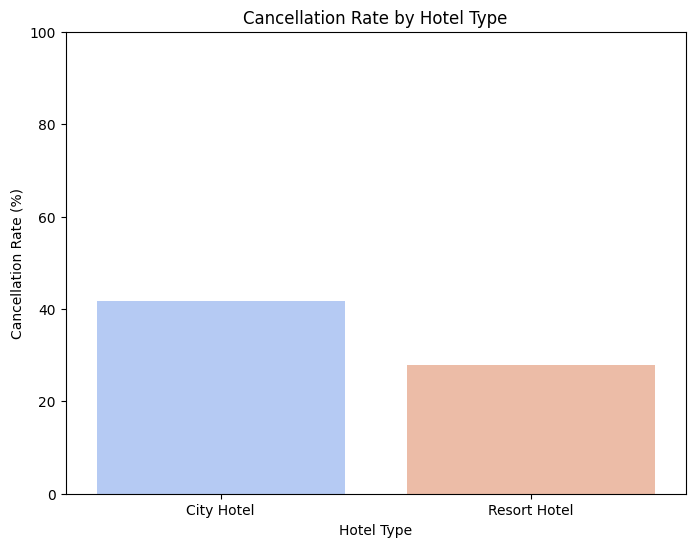

In [29]:
cancellation_rate = df.groupby("hotel")["is_canceled"].mean() * 100
plt.figure(figsize=(8,6))
sns.barplot(x=cancellation_rate.index, y=cancellation_rate.values, palette="coolwarm")
plt.title("Cancellation Rate by Hotel Type")
plt.ylabel("Cancellation Rate (%)")
plt.xlabel("Hotel Type")
plt.ylim(0, 100)
plt.show()

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [31]:
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [32]:
df["country"]

,country
0,PRT
1,PRT
2,GBR
3,GBR
4,GBR
...,...
119385,BEL
119386,FRA
119387,DEU
119388,GBR


**As the number of rows in country columns are not too much so they can be replaced with unkown to avoid any overrepresentation of speific country if I decided to fill the null value with the most repated country which is PTR**

In [33]:
df['country'] = df['country'].fillna('Unknown')

In [34]:
df["children"]

,children
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
119385,0.0
119386,0.0
119387,0.0
119388,0.0


**Most bookings have children of 0, so as 4 missing values is nothing and too little, I will fill them with "0"**

In [35]:
df['children'] = df['children'].fillna(0)

In [36]:
# Checking if there are any missing values
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [37]:
duplicates_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates_count}")
df = df.drop_duplicates().reset_index(drop=True)

Number of duplicate rows: 32020


In [38]:
df.shape

(87370, 30)

In [39]:
def detect_outliers_iqr(df, cols):
    outlier_info = {}
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower) | (df[col] > upper)][col]
        if not outliers.empty:
            outlier_info[col] = {
                "count": len(outliers),
                "percentage": round(len(outliers) / len(df) * 100, 2),
                "lower_bound": lower,
                "upper_bound": upper,
                "min": df[col].min(),
                "max": df[col].max()
            }
    return outlier_info

In [40]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
outlier_summary = detect_outliers_iqr(df, numeric_cols)
outlier_summary

{'lead_time': {'count': 2396,
  'percentage': 2.74,
  'lower_bound': np.float64(-160.0),
  'upper_bound': np.float64(296.0),
  'min': 0,
  'max': 737},
 'stays_in_weekend_nights': {'count': 220,
  'percentage': 0.25,
  'lower_bound': np.float64(-3.0),
  'upper_bound': np.float64(5.0),
  'min': 0,
  'max': 19},
 'stays_in_week_nights': {'count': 1531,
  'percentage': 1.75,
  'lower_bound': np.float64(-3.5),
  'upper_bound': np.float64(8.5),
  'min': 0,
  'max': 50},
 'adults': {'count': 22889,
  'percentage': 26.2,
  'lower_bound': np.float64(2.0),
  'upper_bound': np.float64(2.0),
  'min': 0,
  'max': 55},
 'children': {'count': 8364,
  'percentage': 9.57,
  'lower_bound': np.float64(0.0),
  'upper_bound': np.float64(0.0),
  'min': 0.0,
  'max': 10.0},
 'babies': {'count': 912,
  'percentage': 1.04,
  'lower_bound': np.float64(0.0),
  'upper_bound': np.float64(0.0),
  'min': 0,
  'max': 10},
 'is_repeated_guest': {'count': 3415,
  'percentage': 3.91,
  'lower_bound': np.float64(0.0),
 

In [41]:
def handle_outliers(df):
    df['lead_time'] = df['lead_time'].clip(upper=365)

    df['stays_in_weekend_nights'] = df['stays_in_weekend_nights'].clip(upper=15)
    df['stays_in_week_nights'] = df['stays_in_week_nights'].clip(upper=30)

    df = df[df['adults'] > 0]
    df['adults'] = df['adults'].clip(upper=10)

    df['children'] = df['children'].clip(upper=5)
    df['babies'] = df['babies'].clip(upper=5)

    df['days_in_waiting_list'] = df['days_in_waiting_list'].clip(upper=365)

    df = df[df['adr'] >= 0]
    df['adr'] = df['adr'].clip(upper=500)

    df['required_car_parking_spaces'] = df['required_car_parking_spaces'].clip(upper=3)

    return df

df_cleaned = handle_outliers(df)

/tmp/ipython-input-3085609614.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['adults'] = df['adults'].clip(upper=10)
/tmp/ipython-input-3085609614.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['children'] = df['children'].clip(upper=5)
/tmp/ipython-input-3085609614.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

**Feature Engineering**

In [42]:
df_cleaned["Total_Guests"] = df_cleaned["adults"] + df_cleaned["children"] + df_cleaned["babies"]

In [43]:
df_cleaned["Total_Nights"] = df_cleaned["stays_in_weekend_nights"] + df_cleaned["stays_in_week_nights"]

In [44]:
# Average daily rate per person
df_cleaned["ADR_per_Person"] = df_cleaned["adr"] / df_cleaned["Total_Guests"].replace(0, 1)

In [45]:
df_cleaned["is_family"] = ((df_cleaned["children"] + df_cleaned["babies"]) > 0).astype(int)

In [46]:
df_cleaned = df_cleaned.drop(["reservation_status", "reservation_status_date"], axis=1)

In [47]:
Cols_for_one_hot_encoding = ["meal", "market_segment", "distribution_channel", "deposit_type", "customer_type", "hotel", "reserved_room_type", "assigned_room_type"]
df_cleaned = pd.get_dummies(df_cleaned, columns=Cols_for_one_hot_encoding, drop_first=True)

In [48]:
month_map = {
    'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6,
    'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12
}
df_cleaned["arrival_date_month"] = df_cleaned["arrival_date_month"].map(month_map)

In [49]:
country_counts = df_cleaned['country'].value_counts()
df_cleaned['country_encoded'] = df_cleaned['country'].map(country_counts)

threshold = 200  # keeping countries with at least 200 bookings while countries with lowers reservations make them in other to avoid too much features
df_cleaned['country_grouped'] = df_cleaned['country'].apply(
    lambda x: x if country_counts[x] >= threshold else "Other"
)

In [50]:
# Check if there are any categorical encoding
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86984 entries, 0 to 87369
Data columns (total 65 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     86984 non-null  int64  
 1   lead_time                       86984 non-null  int64  
 2   arrival_date_year               86984 non-null  int64  
 3   arrival_date_month              86984 non-null  int64  
 4   arrival_date_week_number        86984 non-null  int64  
 5   arrival_date_day_of_month       86984 non-null  int64  
 6   stays_in_weekend_nights         86984 non-null  int64  
 7   stays_in_week_nights            86984 non-null  int64  
 8   adults                          86984 non-null  int64  
 9   children                        86984 non-null  float64
 10  babies                          86984 non-null  int64  
 11  country                         86984 non-null  object 
 12  is_repeated_guest               86984

In [51]:
from sklearn.model_selection import train_test_split

X = df_cleaned.drop("is_canceled", axis=1)
y = df_cleaned["is_canceled"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)